# Mini-Project 2 - Clustering

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ali Kodera

ID: 43-11280

Tutorial: T02

---

Name: Lamees Sanad

ID: 43-1671

Tutorial: T02

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Binary:

- mode (0 = Minor, 1 = Major; representing whether the track starts with a major (1) chord progression or not (0))
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

**Note**: the data URL is `https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv`

# Importing and inspecting dataset:

Importing libraries needed and loading dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv')

In [2]:
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [4]:
df.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

# Queries:

What are the 20 most danceable music genres?

In [5]:
df_q1=df[['genres', 'danceability']]

df_q1.sort_values('danceability', ascending=False)['genres'].head(20)

1012          experimental house
1238                  guam indie
917                dutch hip hop
924                dutch rap pop
364     british children's music
1358            indie deutschrap
2743             trance mexicano
1072                    footwork
1119               funk paulista
2244                   proto-rap
2684              tamaulipas rap
756               danish hip hop
46               alberta hip hop
2449          serbian electronic
693          corridos cristianos
2755             trap venezolano
140        atmospheric post-rock
2969                     zouglou
1769                  miami bass
734           cumbia santafesina
Name: genres, dtype: object

What are the 20 lowest energy music genres?

In [6]:
df_q2 = df[['genres', 'energy']]

df_q2.sort_values('energy', ascending=True)['genres'].head(20)

328                          brain waves
283                             binaural
1611              korean classical piano
2476                        singing bowl
1723                            medieval
1441            italian classical guitar
1895           native american spiritual
473            caucasian classical piano
150                   australian ambient
912                dutch classical piano
207               balkan classical piano
279                                bible
210                     baltic classical
327                          boy soprano
152                     australian choir
1184                ghanaian traditional
2913                          warm drone
678                   contemporary choir
72       american 21st century classical
1325    hungarian contemporary classical
Name: genres, dtype: object

What are the 20 loudest music genres?

In [7]:
df_q3 = df[['genres', 'loudness']]

df_q3.sort_values('loudness', ascending=False)['genres'].head(20)

1897     nederlandse hardstyle
18                 action rock
1747             memphis indie
2107           palestinian pop
1777       middle east hip hop
105             arabic hip hop
1510        japanese metalcore
286         birmingham hip hop
1473                    j-idol
1505       japanese indie rock
1514    japanese post-hardcore
2038               nz hardcore
2041                   nz punk
256             belarusian pop
257            belarusian rock
2953                  xtra raw
2003       norwegian punk rock
1583              kawaii metal
49                    alt-idol
2383             russian dance
Name: genres, dtype: object

What are the 20 music genres most commonly performed live?

In [8]:
df_q4 = df[['genres', 'liveness']]

df_q4.sort_values('liveness', ascending=False)['genres'].head(20)

1826              modular synth
1246             gujarati garba
2743            trance mexicano
1784                mindfulness
284                    birdsong
1931                 new comedy
797                 deep comedy
185                    autoharp
656                clean comedy
141          atmospheric sludge
139      atmospheric post-metal
920                  dutch jazz
1864           musica paraibana
1410                irish banjo
2924    west australian hip hop
1223                greek house
2079         organic electronic
1469                 j-acoustic
597       classic icelandic pop
2785               turkish trap
Name: genres, dtype: object

What are the 20 most popular music genres?


In [9]:
df_q5 = df[['genres', 'popularity']]

df_q5.sort_values('popularity', ascending=False)['genres'].head(20)

237                basshall
2778            turkish edm
2533    south african house
2755        trap venezolano
46          alberta hip hop
536      chinese electropop
37                afroswing
31                afro soul
2383          russian dance
1239               guaracha
1381           indie triste
575                 circuit
2800            uk diy punk
2102          pagode baiano
2337          ritmo kombina
2754            trap triste
2002      norwegian pop rap
2834         urbano espanol
1850         musica canaria
110       argentine hip hop
Name: genres, dtype: object

# Cluster Analysis:

The following features were dropped in clustering based on trial and error. This combination offered the best results we could find after looking at the distributions and scatterplots shown below. In addition, some columns generally mean the same thing and thus dont cluster well such as energy and tempo since energetic songs tend to have higher tempos and so on.

In [10]:
df_clust = df.copy()
df_clust.drop('genres', axis='columns', inplace=True)
df_clust.drop('key', axis='columns', inplace=True)
df_clust.drop('mode', axis='columns', inplace=True)
df_clust.drop('duration_ms', axis='columns', inplace=True)
df_clust.drop('liveness', axis='columns', inplace=True)
df_clust.drop('popularity', axis='columns', inplace=True)
df_clust.drop('speechiness', axis='columns', inplace=True)
df_clust.drop('loudness', axis='columns', inplace=True)
df_clust.drop('tempo', axis='columns', inplace=True)

The elbow method showed an optimal k of around 4-6, however we felt that it does not represent how music genres might actually be clustered based on our understanding of music. We decided to try out different values of k and found that 10 is a better representative in terms of genre results in the next section.

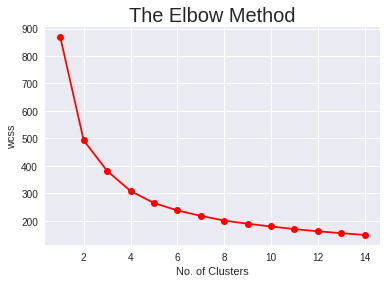

In [11]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_clust)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 15), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
km = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(df_clust);

In [13]:
c = pd.DataFrame(df_clust)
c['cluster']= km.fit_predict(df_clust)
c['cluster'].value_counts()

7    513
0    415
3    372
5    292
8    288
1    265
2    250
4    246
6    191
9    141
Name: cluster, dtype: int64

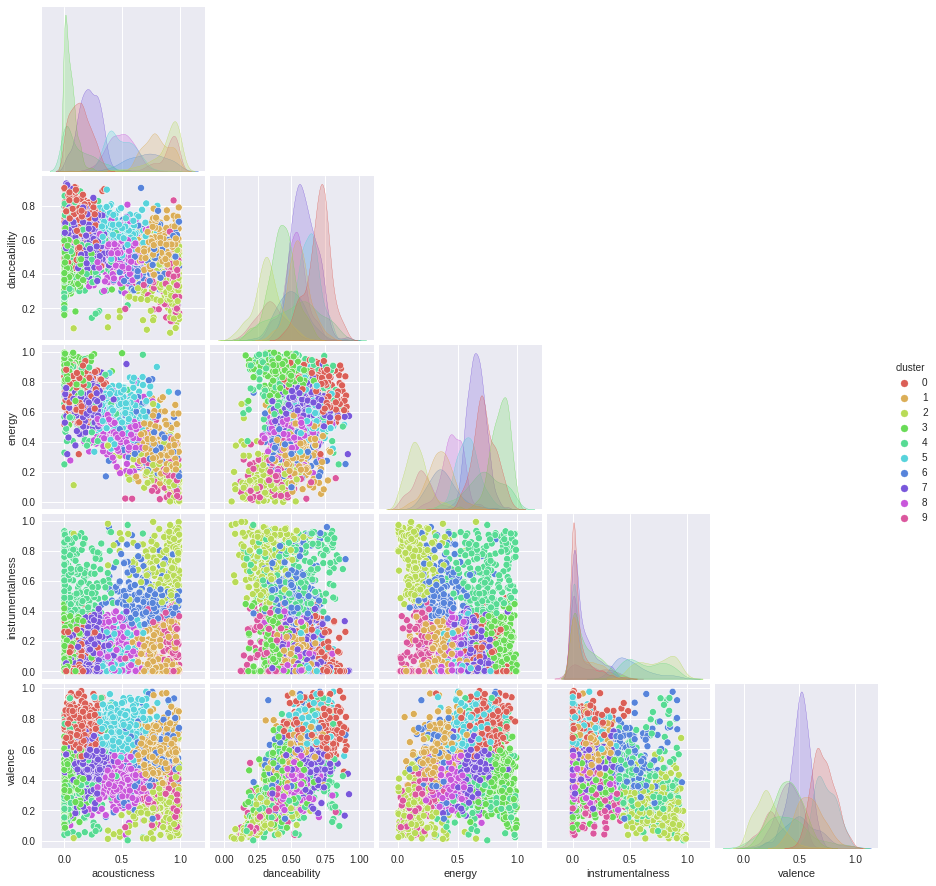

In [14]:
sns.pairplot(c, hue='cluster', palette=sns.color_palette('hls', 10), corner=True)

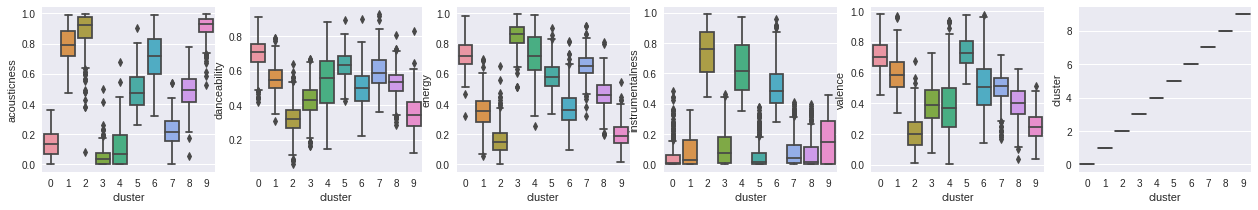

In [15]:
cols = df_clust.select_dtypes('number')
n = int(len(cols)**(1/2))

plt.figure(figsize=(200,200))
for i, col in enumerate(cols, 1):
    plt.subplot(n+1, n, i)
    sns.boxplot(x='cluster', y=col, data=df_clust)

The scatterplots shows some noisy distributions however it is not the case for all of them. The boxplots have unique enough distributions to warrant the amount of cluster we have chosen despite the number of outliers present in some of the clusters.

# Cluster results and discussion:

In [16]:
df_res = df.copy()

labels = km.labels_
df_res['labels'] = labels;

In [17]:
df_res[df_res['labels'] == 0].sample(20)['genres']

564              christian punk
693         corridos cristianos
1408            irish accordion
2828      underground power pop
2683           tamaulipas indie
25               african reggae
2576          spiritual hip hop
1256         hamburg electronic
286          birmingham hip hop
2328               rennes indie
1106            french synthpop
262            belgian hardcore
1894    native american hip hop
1817    modern psychedelic folk
388               bronx hip hop
1628                      latin
1685                lovers rock
1292                    hip hop
917               dutch hip hop
2774               tunisian pop
Name: genres, dtype: object

In [18]:
df_res[df_res['labels'] == 1].sample(20)['genres']

1250                        gypsy
1577                       kabyle
2888          vintage spanish pop
739                   cypriot pop
2838            uzbek traditional
818        deep latin alternative
2887             vintage schlager
2266                 punjabi folk
1921                   nepali pop
595             classic greek pop
549                         choro
1576                     kabarett
1593                    keroncong
464             cape verdean folk
372                  british folk
1581                 kashmiri pop
269     belgian singer-songwriter
2780                 turkish folk
1871                 musica sarda
730                cumbia peruana
Name: genres, dtype: object

In [19]:
df_res[df_res['labels'] == 2].sample(20)['genres']

1610       korean classical performance
1299    historic orchestral performance
1977                  nordic soundtrack
121                       armenian folk
2552                                spa
2086                     orthodox chant
366             british classical piano
1244                   guitarra clasica
639                    classical guitar
687                          contrabass
1442            italian classical piano
945                      ecm-style jazz
228                       baroque brass
2327                        renaissance
1956              new zealand classical
977                     english baroque
1523               japanese traditional
2425                              sarod
2476                       singing bowl
2075                          orchestra
Name: genres, dtype: object

In [27]:
df_res[df_res['labels'] == 3].sample(20)['genres']

1214                  gothic rock
1479                       j-punk
563         christian power metal
1393              industrial rock
2492            slavic folk metal
38                      aggrotech
1995        norwegian death metal
1680              louisiana metal
2744                   trancecore
1478                    j-poprock
1208             gothenburg metal
1377               indie shoegaze
2236    progressive post-hardcore
90                          anime
2351    rock independant francais
1189                    glam punk
2222               power-pop punk
2635           swedish indie rock
2665        symphonic black metal
1145            garage punk blues
Name: genres, dtype: object

In [21]:
df_res[df_res['labels'] == 4].sample(20)['genres']

787                        deathgrind
1229                        grindcore
1399           instrumental math rock
1755                     metal guitar
1181                    german trance
10                         acid house
1789                     minimal wave
284                          birdsong
1049                     focus trance
940               eastern bloc groove
752           danish alternative rock
575                           circuit
829                  deep psychobilly
2697    technical melodic death metal
1258                    hammond organ
1969                       noise punk
64                ambient black metal
2604                     sudanese pop
1088                       french dnb
1991            norwegian black metal
Name: genres, dtype: object

In [22]:
df_res[df_res['labels'] == 5].sample(20)['genres']

2869           vietnamese pop
2163              polish rock
2361               rockabilly
879             dominican pop
2751            trap mexicano
2741         traditional soul
1857          musica infantil
204         bakersfield sound
215         banda carnavalera
1073                    forro
2703                   tejano
520             chilean indie
1064       folklore boliviano
2325         regional mexican
527                 chill pop
16              acoustic punk
722                    cumbia
1101            french reggae
80                american oi
2228    progressive bluegrass
Name: genres, dtype: object

In [23]:
df_res[df_res['labels'] == 6].sample(20)['genres']

127                 asheville indie
107               argentine ambient
2597                         stride
1553                      jazz trio
1289           hindustani classical
1688                           lute
2733          traditional bluegrass
330                      brass band
2825                        ukulele
377                    british jazz
2085                orquesta tipica
1552                 jazz saxophone
67                      ambient idm
1290        hindustani instrumental
2884                   vintage jazz
1536               jazz double bass
2583                   steel guitar
1994    norwegian contemporary jazz
1275                 harmonica jazz
1538                     jazz flute
Name: genres, dtype: object

In [24]:
df_res[df_res['labels'] == 7].sample(20)['genres']

2442                    scratch
1903                   neo soul
132                    atl trap
2016                    nu jazz
2280               quebec indie
303                  blues rock
2568           spanish pop rock
2942         worcester ma indie
1819                modern rock
2629           swedish hardcore
2147           pittsburgh indie
2213                  post-punk
133               atlanta indie
1834                 moombahton
1883              naija worship
2714             thai folk rock
617                classic rock
2372                 roots rock
1801    modern alternative rock
2656              swing revival
Name: genres, dtype: object

In [25]:
df_res[df_res['labels'] == 8].sample(20)['genres']

2680    taiwan singer-songwriter
1430       israeli mediterranean
489                  chamber pop
1724               medieval folk
682            contemporary folk
1019               family gospel
1396      instrumental bluegrass
1716          mariachi cristiano
1357              indie cafe pop
2198                  pornogrind
459                     cantopop
15                  acoustic pop
1365               indie hip hop
2648                swedish soul
247                  beach music
1337              icelandic folk
864                  devon indie
1320                        hula
493                  channel pop
1707                    mandopop
Name: genres, dtype: object

In [26]:
df_res[df_res['labels'] == 9].sample(20)['genres']

1439            italian bass
1381            indie triste
421           canadian choir
226        barockinterpreten
590       classic eurovision
414     cambridgeshire indie
1426       israeli classical
655         clawhammer banjo
2063         old-time fiddle
1097        french orchestra
1436        italian baritone
1935        new isolationism
1652             latvian pop
88          anglican liturgy
1753        messianic praise
1691                madrigal
1462         italian soprano
631       classical baritone
1103      french romanticism
413          cambridge choir
Name: genres, dtype: object

The results for each cluster generally make sense in the groupings presented. For example cluster 3 includes many subgenres of metal which makes sense. Not all subgenres of metal are the same however, and it shows as some unique subgenres are included in different clusters.

# Bonus:

In [47]:
def genre_recommender(genre):
  if not isinstance(genre, str):
    return 'Invalid Input'
  try:
    cluster = df_res[df_res['genres']==genre]['labels'].tolist()[0]
  except:
    print('genre does not exist')
    return
  if cluster is None:
    return 'This genre does not exist'
  return df_res[df_res['labels']==cluster].sample(5)['genres'].tolist()

In [48]:
genre_recommender(12)

'Invalid Input'

In [49]:
genre_recommender('sha3by')

genre does not exist


In [59]:
genre_recommender('technical death metal')

['uplifting trance',
 'japanese psychedelic',
 'deep full on',
 'metal guitar',
 'deep minimal techno']